In [16]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

filePath = "/sfs/qumulo/qhome/cms8ey/ds5559/DS 5559 Project/Acquisition Files"

In [49]:
#Figuring out path to the files
%%bash
pwd

/sfs/qumulo/qhome/cms8ey/ds5559/DS 5559 Project


In [3]:
#ended up not using this but figured I'd leave it for now
schema = StructType([StructField("Loan Number", StringType(), True)
                     ,StructField("Origination Channel", StringType(), True)
                     ,StructField("Seller Name", StringType(), True)
                     ,StructField("Original Interest Rate", FloatType(), True)
                     ,StructField("Original Balance", FloatType(), True)
                     ,StructField("Original Term", IntegerType(), True)
                     ,StructField("Origination Date", DateType(), True)
                     ,StructField("First Payment Date", DateType(), True)
                     ,StructField("LTV", FloatType(), True)
                     ,StructField("CLTV", FloatType(), True)
                     ,StructField("Number of Borrowers", IntegerType(), True)
                     ,StructField("DTI", FloatType(), True)
                     ,StructField("Primary Borrower Credit Score", IntegerType(), True)
                     ,StructField("First Time Home Buyer Flag", StringType(), True)
                     ,StructField("Loan Purpose", StringType(), True)
                     ,StructField("Property Type", StringType(), True)
                     ,StructField("Number of Units", StringType(), True)
                     ,StructField("Occupancy Type", StringType(), True)
                     ,StructField("Property State", StringType(), True)
                     ,StructField("Zip Code Short", StringType(), True)
                     ,StructField("PMI Percent", FloatType(), True)
                     ,StructField("Product Type", StringType(), True)
                     ,StructField("Joint Borrower Credit Score", IntegerType(), True)
                     ,StructField("Mortgage Insurance Type", IntegerType(), True)
                     ,StructField("Relocation Mortgage Indicator", StringType(), True)
                     
                    
                    
                    
                    
                    
                    
                    ])

In [2]:
#list to hold column names
cols = ["Loan_Number",
"Origination_Channel",
"Seller_Name",
"Original_Interest_Rate",
"Original_Balance",
"Original_Term",
"Origination_Date",
"First_Payment_Date",
"LTV",
"CLTV",
"Number_of_Borrowers",
"DTI",
"Primary_Borrower_Credit_Score",
"First_Time_Home_Buyer_Flag",
"Loan_Purpose",
"Property_Type",
"Number_of_Units",
"Occupancy_Type",
"Property_State",
"Zip_Code_Short",
"PMI_Percent",
"Product_Type",
"Joint_Borrower_Credit_Score",
"Mortgage_Insurance_Type",
"Relocation_Mortgage_Indicator"
]

In [3]:
#https://stackoverflow.com/questions/39926411/provide-schema-while-reading-csv-file-as-a-dataframe
dfr = spark.read.csv(
    path=filePath,
    #header="False",
    #schema = cols,
    inferSchema= "true",
    #quote=""
    sep =  "|"
)

dfr.show(5)




+------------+---+--------------------+-----+------+---+-------+-------+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|         _c0|_c1|                 _c2|  _c3|   _c4|_c5|    _c6|    _c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|
+------------+---+--------------------+-----+------+---+-------+-------+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|100001947268|  C|BANK OF AMERICA, ...| 7.75|179000|180|05/2000|07/2000| 71| 71|   1|  19| 784|   Y|   P|  SF|   2|   P|  NY| 103|null| FRM|null|null|   N|
|100004723048|  C|FIRST TENNESSEE B...|8.375|133000|360|07/2000|09/2000| 95| 95|   2|  32| 778|   Y|   P|  SF|   1|   P|  TN| 376|  25| FRM| 706|   1|   N|
|100006677622|  R|  GMAC MORTGAGE, LLC| 8.25|188000|360|08/2000|10/2000| 80| 80|   2|  29| 776|   N|   P|  SF|   1|   P|  NH|  30|null| FRM| 792|null|   N|
|100009883013|  B|JPMORGAN CHASE BA...|  8.5| 88000|360|06/2000|

In [4]:
#https://stackoverflow.com/questions/34077353/how-to-change-dataframe-column-names-in-pyspark
dfr = dfr.toDF(*cols)

#create temp table for querying
dfr.createOrReplaceTempView("dfr")

#display new columns
dfr.take(1)

[Row(Loan_Number=100001947268, Origination_Channel='C', Seller_Name='BANK OF AMERICA, N.A.', Original_Interest_Rate=7.75, Original_Balance=179000, Original_Term=180, Origination_Date='05/2000', First_Payment_Date='07/2000', LTV=71, CLTV=71, Number_of_Borrowers=1, DTI=19, Primary_Borrower_Credit_Score=784, First_Time_Home_Buyer_Flag='Y', Loan_Purpose='P', Property_Type='SF', Number_of_Units=2, Occupancy_Type='P', Property_State='NY', Zip_Code_Short=103, PMI_Percent=None, Product_Type='FRM', Joint_Borrower_Credit_Score=None, Mortgage_Insurance_Type=None, Relocation_Mortgage_Indicator='N')]

In [44]:
#Show Schema
dfr.printSchema()

root
 |-- Loan_Number: long (nullable = true)
 |-- Origination_Channel: string (nullable = true)
 |-- Seller_Name: string (nullable = true)
 |-- Original_Interest_Rate: double (nullable = true)
 |-- Original_Balance: integer (nullable = true)
 |-- Original_Term: integer (nullable = true)
 |-- Origination_Date: string (nullable = true)
 |-- First_Payment_Date: string (nullable = true)
 |-- LTV: integer (nullable = true)
 |-- CLTV: integer (nullable = true)
 |-- Number_of_Borrowers: integer (nullable = true)
 |-- DTI: integer (nullable = true)
 |-- Primary_Borrower_Credit_Score: integer (nullable = true)
 |-- First_Time_Home_Buyer_Flag: string (nullable = true)
 |-- Loan_Purpose: string (nullable = true)
 |-- Property_Type: string (nullable = true)
 |-- Number_of_Units: integer (nullable = true)
 |-- Occupancy_Type: string (nullable = true)
 |-- Property_State: string (nullable = true)
 |-- Zip_Code_Short: integer (nullable = true)
 |-- PMI_Percent: integer (nullable = true)
 |-- Product

In [69]:
#Count of all records
dfr.count()

20127703

In [48]:
#number of columns
len(dfr.columns)

25

In [38]:
#Distribution of Property Types
spark.sql("""
Select count(*) as PropCount
,count(*)/(Select cast(count(*) as float) from dfr) as RatioOfTotal
,Property_Type 
from dfr 
group by Property_Type""").show()

+---------+--------------------+-------------+
|PropCount|        RatioOfTotal|Property_Type|
+---------+--------------------+-------------+
|  3684334| 0.18304790253274789|           PU|
|       58|2.881600405093398E-6|         null|
| 14533443|  0.7220616420034793|           SF|
|        1|4.968276560505858E-8|            S|
|   138293|0.006870778703820366|           MH|
|   104067|0.005170336368221631|           CP|
|  1667507| 0.08284635942579442|           CO|
+---------+--------------------+-------------+



In [41]:
#Distribution of Occupation Types
spark.sql("""Select 
count(*) as OccupyCount
,count(*)/(Select cast(count(*) as float) from dfr) as RatioOfTotal
, Occupancy_Type 
from dfr as D 
group by Occupancy_Type""").show()

+-----------+--------------------+--------------+
|OccupyCount|        RatioOfTotal|Occupancy_Type|
+-----------+--------------------+--------------+
|         61|3.030648701908573...|          null|
|     862678|0.042860228866640725|             S|
|    1441012| 0.07159346143007668|             I|
|   17823952|  0.8855432293718151|             P|
+-----------+--------------------+--------------+



[Row(OccupyCount=61, RatioOfTotal=3.0306487019085735e-06, Occupancy_Type=None),
 Row(OccupyCount=862678, RatioOfTotal=0.042860228866640725, Occupancy_Type='S'),
 Row(OccupyCount=1441012, RatioOfTotal=0.07159346143007668, Occupancy_Type='I'),
 Row(OccupyCount=17823952, RatioOfTotal=0.8855432293718151, Occupancy_Type='P')]

In [42]:
#Distribution of Occupancy and property types, to narrow this project we may want to focus on just P/SF
spark.sql("""Select count(*) as OandPCount
,count(*)/(Select cast(count(*) as float) from dfr) as RatioOfTotal
,Occupancy_Type
,Property_Type 
from dfr as d

group by Occupancy_Type, Property_Type""").show()

+----------+--------------------+--------------+-------------+
|OandPCount|        RatioOfTotal|Occupancy_Type|Property_Type|
+----------+--------------------+--------------+-------------+
|  13004369|    0.64609301686869|             P|           SF|
|      1235|6.135821552224735E-5|             I|           MH|
|   3269650|  0.1624452545605798|             P|           PU|
|    213425|0.010603544249259628|             I|           PU|
|        58|2.881600405093398E-6|          null|         null|
|     11965|5.944542904645259E-4|             S|           MH|
|      4038|2.006190075132265...|             S|           CP|
|         2|9.936553121011716E-8|          null|           SF|
|   1061059| 0.05271634559013785|             I|           SF|
|        24|1.192386374521405...|             I|           CP|
|    100005|0.004968524974333883|             P|           CP|
|         1|4.968276560505858E-8|          null|            S|
|    468013|0.023252180179120282|             S|       

In [43]:
#Distribution of Occupation Types
spark.sql("""Select 
count(*) as PurposeCount
,count(*)/(Select cast(count(*) as float) from dfr) as RatioOfTotal
, Loan_Purpose 
from dfr as D 
group by Loan_Purpose""").show()

+------------+--------------------+------------+
|PurposeCount|        RatioOfTotal|Loan_Purpose|
+------------+--------------------+------------+
|          58|2.881600405093398E-6|        null|
|        4123|2.048420425896565...|           U|
|     5929886|  0.2946131362027184|           C|
|     5890108|  0.2926368551524804|           R|
|     8303528|  0.4125422353190409|           P|
+------------+--------------------+------------+



In [51]:
#Distribution of first time homebuyers 
spark.sql("""Select 
count(*) as PurposeCount
,count(*)/(Select cast(count(*) as float) from dfr) as RatioOfTotal
, First_Time_Home_Buyer_Flag 
from dfr as D 
group by First_Time_Home_Buyer_Flag""").show()

+------------+--------------------+--------------------------+
|PurposeCount|        RatioOfTotal|First_Time_Home_Buyer_Flag|
+------------+--------------------+--------------------------+
|          56|2.782234873883280...|                      null|
|     2636036|  0.1309655587144962|                         Y|
|       10234|5.084534232021695E-4|                         U|
|    17481377|  0.8685231559446621|                         N|
+------------+--------------------+--------------------------+



In [6]:
#Distribution of Occupation Types, collected to allow for plotting
toPlot = spark.sql("""Select 
count(*) as OccupyCount
,count(*)/(Select cast(count(*) as float) from dfr) as RatioOfTotal
, Occupancy_Type 
from dfr as D 
group by Occupancy_Type""").collect()


toPlot

[Row(OccupyCount=61, RatioOfTotal=3.0306487019085735e-06, Occupancy_Type=None),
 Row(OccupyCount=862678, RatioOfTotal=0.042860228866640725, Occupancy_Type='S'),
 Row(OccupyCount=1441012, RatioOfTotal=0.07159346143007668, Occupancy_Type='I'),
 Row(OccupyCount=17823952, RatioOfTotal=0.8855432293718151, Occupancy_Type='P')]

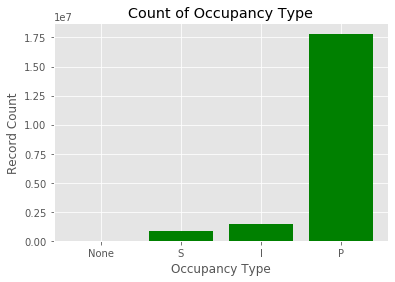

In [18]:
#https://benalexkeen.com/bar-charts-in-matplotlib/

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x_ticks = [x for x in range(len(toPlot))]
plotcols = ["None" if x[2] is None else x[2] for x in toPlot]

plt.bar(x_ticks, height = [x[0] for x in toPlot], color='green')
plt.xlabel("Occupancy Type")
plt.ylabel("Record Count")
plt.title("Count of Occupancy Type")
plt.xticks(x_ticks,plotcols)
plt.show()

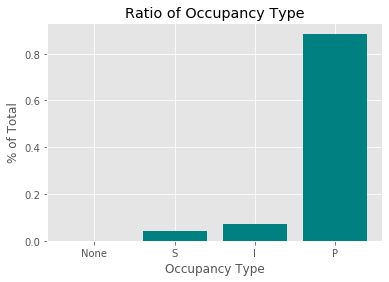

In [17]:
%matplotlib inline
plt.style.use('ggplot')

x_ticks = [x for x in range(len(toPlot))]
plotcols = ["None" if x[2] is None else x[2] for x in toPlot]

plt.bar(x_ticks, height = [x[1] for x in toPlot], color='teal')
plt.xlabel("Occupancy Type")
plt.ylabel("% of Total")
plt.title("Ratio of Occupancy Type")
plt.xticks(x_ticks,plotcols)
plt.show()

In [34]:
#Primary credit score summary
dfr.describe("Primary_Borrower_Credit_Score").show()

+-------+-----------------------------+
|summary|Primary_Borrower_Credit_Score|
+-------+-----------------------------+
|  count|                     20046269|
|   mean|            742.3032591251769|
| stddev|            53.66955770937492|
|    min|                          300|
|    max|                          850|
+-------+-----------------------------+



In [52]:
#Primary credit score summary
#It may be worth combining this with the primary credit score and taking the highest or lowest score on the application
dfr.describe("Joint_Borrower_Credit_Score").show()

+-------+---------------------------+
|summary|Joint_Borrower_Credit_Score|
+-------+---------------------------+
|  count|                    9983923|
|   mean|          750.9828305967504|
| stddev|         50.872040009574974|
|    min|                        300|
|    max|                        850|
+-------+---------------------------+



In [35]:
#LTV Summary
dfr.describe("LTV").show()

+-------+-----------------+
|summary|              LTV|
+-------+-----------------+
|  count|         20127648|
|   mean|70.96592726581864|
| stddev|17.47826941276611|
|    min|                1|
|    max|               97|
+-------+-----------------+



In [50]:
#Combined LTV Summary, could be used to create a feature.
#If the CLTV > LTV it would indicate that there is a second mortgage associated with the property
dfr.describe("CLTV").show()

+-------+------------------+
|summary|              CLTV|
+-------+------------------+
|  count|          19821975|
|   mean| 71.79199993946114|
| stddev|17.583726924349808|
|    min|                 1|
|    max|               197|
+-------+------------------+



In [36]:
#DTI Summary
dfr.describe("DTI").show()

+-------+------------------+
|summary|               DTI|
+-------+------------------+
|  count|          19759429|
|   mean| 34.11001881683929|
| stddev|11.363787243310226|
|    min|                 1|
|    max|                64|
+-------+------------------+



In [53]:
#PMI Summary
#This field is largely null.  If a loan has PMI it is likely due to it having other significant risk factors.
#It could be worthwhile to convert this into a bit flag instead of using it as a continuous variable
dfr.describe("PMI_Percent").show()

+-------+------------------+
|summary|       PMI_Percent|
+-------+------------------+
|  count|           3960585|
|   mean|24.015910780856867|
| stddev|  7.01740787963051|
|    min|                 1|
|    max|                50|
+-------+------------------+

